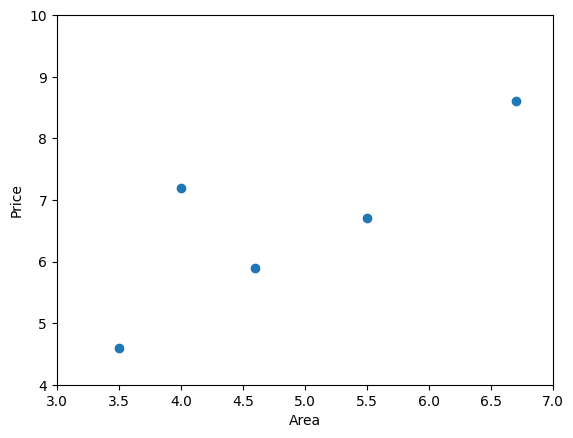

In [82]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("./data/data_outlier.csv", delimiter=",")

x_data = data[:, 0]
y_data = data[:, 1]
N = len(x_data)

plt.scatter(x_data, y_data)
plt.xlabel("Area")
plt.ylabel("Price")
plt.xlim(3, 7)
plt.ylim(4, 10)
plt.show()

In [83]:
def predict(x, w, b):
    return x * w + b


def compute_gradient_mse(y_hat, y, x):
    dw = 2 * x * (y_hat - y)
    db = 2 * (y_hat - y)
    return (dw, db)


def compute_gradient_mae(y_hat, y, x):
    dw = x*(y_hat-y)/abs(y_hat-y)
    db = (y_hat-y)/abs(y_hat-y)
    return (dw, db)


def compute_gradient_huber_loss(y_hat, y, x, delta=5):
    if abs(y_hat - y) < delta:
        dw, db = compute_gradient_mse(y_hat, y, x)
    else:
        dw = delta*x*(y_hat-y)/abs(y_hat-y)
        db = delta*(y_hat-y)/abs(y_hat-y)
    return (dw, db)


def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new)


def mse_loss(y_hat, y):
    return (y_hat - y) ** 2


def mae_loss(y_hat, y):
    return abs(y_hat - y)


def huber_loss(y_hat, y, delta=5):
    if abs(y_hat - y) < delta:
        loss = mse_loss(y_hat, y)
    else:
        loss = delta * abs(y_hat - y) - 0.5 * delta * delta
    return loss


In [84]:
# init weights
b = 0.04
w = -0.34
lr = 0.01
w_mse, b_mse = w, b
w_mae, b_mae = w, b
w_hl, b_hl = w, b

epoch_max = 10
losses_mse = []
losses_mae = []
losses_hl = []

for epoch in range(epoch_max):
    for i in range(N):
        x = x_data[i]
        y = y_data[i]

        # predict
        y_hat_mse = predict(x, w_mse, b_mse)
        y_hat_mae = predict(x, w_mae, b_mae)
        y_hat_hl = predict(x, w_hl, b_hl)

        # compute loss
        loss_mse = mse_loss(y_hat_mse, y)
        losses_mse.append(loss_mse)
        loss_mae = mae_loss(y_hat_mae, y)
        losses_mae.append(loss_mae)
        loss_hl = huber_loss(y_hat_hl, y)
        losses_hl.append(loss_hl)

        # compute_gradient
        (dw_mse, db_mse) = compute_gradient_mse(y_hat_mse, y, x)
        (dw_mae, db_mae) = compute_gradient_mae(y_hat_mae, y, x)
        (dw_hl, db_hl) = compute_gradient_huber_loss(y_hat_hl, y, x)

        # update weights
        (w_mse, b_mse) = update_weight(w_mse, b_mse, lr, dw_mse, db_mse)
        (w_mae, b_mae) = update_weight(w_mae, b_mae, lr, dw_mae, db_mae)
        (w_hl, b_hl) = update_weight(w_hl, b_hl, lr, dw_hl, db_hl)

print(f"MSE: w = {w_mse}, b = {b_mse}")
print(f"MAE: w = {w_mae}, b = {b_mae}")
print(f"Huber Loss: w = {w_hl}, b = {b_hl}")

MSE: w = 1.339702539241336, b = 0.4438013129971521
MAE: w = 1.2340000000000002, b = 0.36000000000000015
Huber Loss: w = 1.3265003833215943, b = 0.5062156570518963


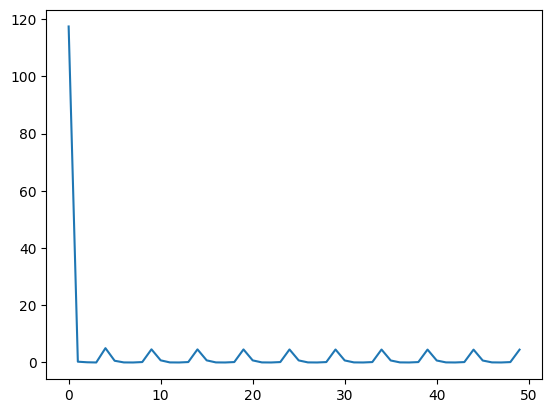

In [85]:
plt.plot(losses_mse) 

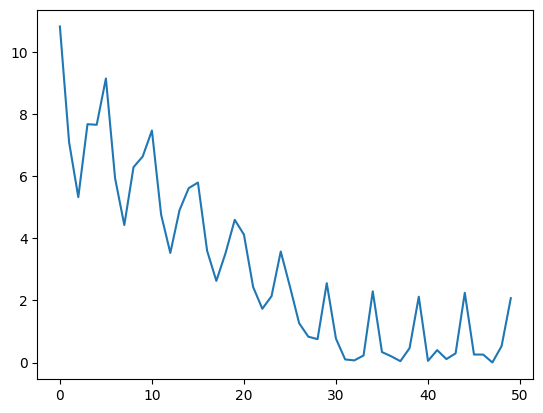

In [86]:
plt.plot(losses_mae) 

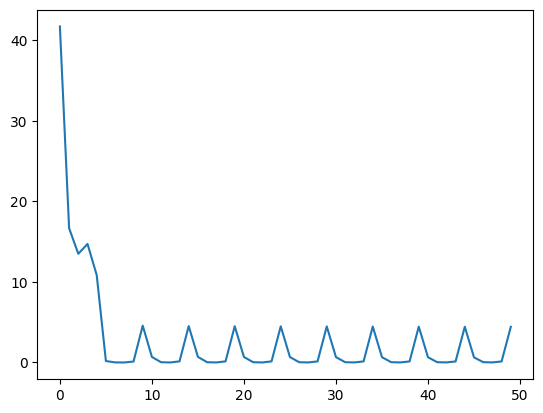

In [87]:
plt.plot(losses_hl) 

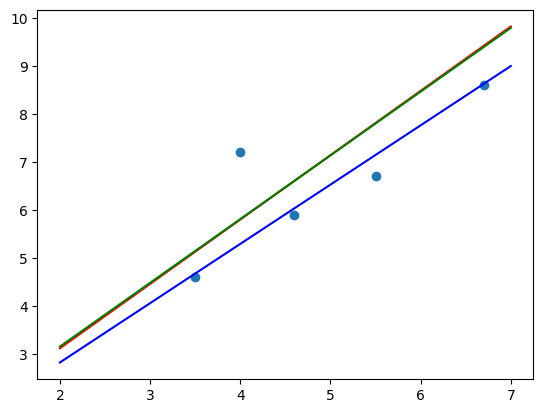

In [ ]:
x_data = range(2, 8)
y_data_mse = [x*w_mse + b_mse for x in x_data]
y_data_mae = [x*w_mae + b_mae for x in x_data]
y_data_hl = [x*w_hl + b_hl for x in x_data]
plt.plot(x_data, y_data_mse, 'r')
plt.plot(x_data, y_data_mae, 'b')
plt.plot(x_data, y_data_hl, 'g')

areas  = data[:, 0]
prices = data[:, 1]
plt.scatter(areas, prices)


plt.show()